# Case 1. Heart Disease Classification
# Ville Seeste 4.2.2018 
# Helsinki Metropolia University of Applied Sciences

Objectives in this exercise is to learn how to preprocess data and with that data try to diagnos heart disease.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
import pandas as pd

colnames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'diagnosis']

# Processed data

pCleveland = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', na_values='?', names=colnames)
pHungarian = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data', na_values='?', names=colnames)
pSwitzerland = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data', na_values='?', names=colnames)
pLongBeachVA = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data', na_values='?', names=colnames)

# Raw data
#
# Reprocessed hungarian data seems to be same as processed
# Raw Cleveland data seems to be broken
#rHungarian = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/hungarian.data', na_values='-9', sep=' ')

In [22]:
datas = [pCleveland, pHungarian, pSwitzerland, pLongBeachVA]
data = pd.concat(datas)

In [23]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [24]:
diagnoses = data['diagnosis']
data = data.drop(['diagnosis'], axis=1)
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0


In [25]:
y_train = diagnoses[:644]
y_test = diagnoses[644:]
# to categorical
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

x_train = data[:644]
x_test = data[644:]

In [34]:
y_test

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [27]:
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train -= mean
x_train /= (2 * std)

x_test -= mean
x_test /= (2 * std)
x_train.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.678153,0.313823,-1.103577,0.379271,0.018120,1.427543,0.829207,0.138732,-0.346975,0.707114,1.149575,-0.356452,0.294502
1,0.900748,0.313823,0.459554,0.798795,0.321631,-0.175126,0.829207,-0.733379,0.720513,0.332132,0.279099,1.250244,-0.484033
2,0.900748,0.313823,0.459554,-0.319936,-0.004786,-0.175126,0.829207,-0.297324,0.720513,0.847733,0.279099,0.714678,0.554014
3,-0.768712,0.313823,-0.061490,-0.040253,0.115473,-0.175126,-0.342082,0.907020,-0.346975,1.269589,1.149575,-0.356452,-0.484033
4,-0.546117,-0.796628,-0.582533,-0.040253,-0.147952,-0.175126,0.829207,0.595552,-0.346975,0.285259,-0.591377,-0.356452,-0.484033
5,0.288612,0.313823,-0.582533,-0.319936,0.035300,-0.175126,-0.342082,0.720139,-0.346975,0.004022,-0.591377,-0.356452,-0.484033
6,0.622504,-0.796628,0.459554,0.239429,0.218552,-0.175126,0.829207,0.346377,-0.346975,1.316461,1.149575,0.714678,-0.484033
7,0.344261,-0.796628,0.459554,-0.319936,0.711042,-0.175126,-0.342082,0.408671,0.720513,-0.089724,-0.591377,-0.356452,-0.484033
8,0.678153,0.313823,0.459554,-0.040253,0.138379,-0.175126,0.829207,0.076438,-0.346975,0.285259,0.279099,0.179113,0.554014
9,0.121667,0.313823,0.459554,0.239429,-0.153678,1.427543,0.829207,0.242555,0.720513,1.082097,1.149575,-0.356452,0.554014


In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(13,), activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [29]:
hist = model.fit(x_train, y_train, epochs=50, batch_size=100, validation_data=(x_test,y_test), shuffle=True)

Train on 644 samples, validate on 276 samples
Epoch 1/50
644/644 [==============================] - 0s 619us/step - loss: nan - acc: 0.5326 - val_loss: nan - val_acc: 0.2029
Epoch 2/50
644/644 [==============================] - 0s 26us/step - loss: nan - acc: 0.5512 - val_loss: nan - val_acc: 0.2029
Epoch 3/50
644/644 [==============================] - 0s 23us/step - loss: nan - acc: 0.5512 - val_loss: nan - val_acc: 0.2029
Epoch 4/50
644/644 [==============================] - 0s 26us/step - loss: nan - acc: 0.5512 - val_loss: nan - val_acc: 0.2029
Epoch 5/50
644/644 [==============================] - 0s 30us/step - loss: nan - acc: 0.5512 - val_loss: nan - val_acc: 0.2029
Epoch 6/50
644/644 [==============================] - 0s 26us/step - loss: nan - acc: 0.5512 - val_loss: nan - val_acc: 0.2029
Epoch 7/50
644/644 [==============================] - 0s 25us/step - loss: nan - acc: 0.5512 - val_loss: nan - val_acc: 0.2029
Epoch 8/50
644/644 [==============================] - 0s 25us/st

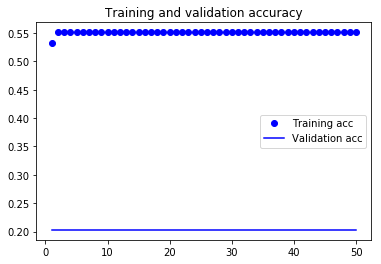

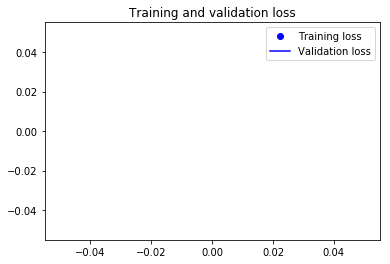

In [30]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()